# Final Project for AI 221

AI 221 | 1st Sem AY 2024-2025  
Students: Jemima Bian Anila, Joshua Cantor, Michael Spencer Quinto, MEng in AI  
Instructors: Dr. Miguel Remolona | Dr. Jon Dewitt Dalisay

## Dataset

https://data.mendeley.com/datasets/tsvdyhbphs/1

https://www.kaggle.com/datasets/jaydepaolomirandilla/philippine-medicinal-plant-leaf-dataset/data


In [1]:
import sys
from pathlib import Path
  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

/tmp/ipykernel_942388/564329230.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Add project root directory to Python path to allow importing from src folder
notebook_dir = Path("__file__").resolve().parent
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# Import utility modules from `src` folder

Note: all reusable code like transformations for the dataframes, etc. can be found inside the `src` folder and are imported here for better modularity and version control


# Data Loading and Inspection


In [5]:
from src.utils_data import FEATURE_DATA_FOLDER

feature_dataset_path = FEATURE_DATA_FOLDER / "feature_dataset.csv"
feature_dataset = pd.read_csv(feature_dataset_path)
feature_dataset.head()

,image_filename,class_name,class_number,rgb_0_mean,rgb_0_std,rgb_0_skewness,rgb_1_mean,rgb_1_std,rgb_1_skewness,rgb_2_mean,rgb_2_std,rgb_2_skewness,hsv_0_mean,hsv_0_std,hsv_0_skewness,hsv_1_mean,hsv_1_std,hsv_1_skewness,hsv_2_mean,hsv_2_std,hsv_2_skewness,lab_0_mean,lab_0_std,lab_0_skewness,lab_1_mean,lab_1_std,lab_1_skewness,lab_2_mean,lab_2_std,lab_2_skewness,rgb_0_hist_0,rgb_0_hist_1,rgb_0_hist_2,rgb_0_hist_3,rgb_0_hist_4,rgb_0_hist_5,rgb_0_hist_6,rgb_0_hist_7,rgb_0_hist_8,rgb_0_hist_9,rgb_0_hist_10,rgb_0_hist_11,rgb_0_hist_12,rgb_0_hist_13,rgb_0_hist_14,rgb_0_hist_15,rgb_0_hist_16,rgb_0_hist_17,rgb_0_hist_18,rgb_0_hist_19,rgb_0_hist_20,rgb_0_hist_21,rgb_0_hist_22,rgb_0_hist_23,rgb_0_hist_24,rgb_0_hist_25,rgb_0_hist_26,rgb_0_hist_27,rgb_0_hist_28,rgb_0_hist_29,rgb_0_hist_30,rgb_0_hist_31,rgb_1_hist_0,rgb_1_hist_1,rgb_1_hist_2,rgb_1_hist_3,rgb_1_hist_4,rgb_1_hist_5,rgb_1_hist_6,rgb_1_hist_7,rgb_1_hist_8,rgb_1_hist_9,rgb_1_hist_10,rgb_1_hist_11,rgb_1_hist_12,rgb_1_hist_13,rgb_1_hist_14,rgb_1_hist_15,rgb_1_hist_16,rgb_1_hist_17,rgb_1_hist_18,rgb_1_hist_19,rgb_1_hist_20,rgb_1_hist_21,rgb_1_hist_22,rgb_1_hist_23,rgb_1_hist_24,rgb_1_hist_25,rgb_1_hist_26,rgb_1_hist_27,rgb_1_hist_28,rgb_1_hist_29,rgb_1_hist_30,rgb_1_hist_31,rgb_2_hist_0,rgb_2_hist_1,rgb_2_hist_2,rgb_2_hist_3,rgb_2_hist_4,rgb_2_hist_5,rgb_2_hist_6,rgb_2_hist_7,rgb_2_hist_8,rgb_2_hist_9,rgb_2_hist_10,rgb_2_hist_11,rgb_2_hist_12,rgb_2_hist_13,rgb_2_hist_14,rgb_2_hist_15,rgb_2_hist_16,rgb_2_hist_17,rgb_2_hist_18,rgb_2_hist_19,rgb_2_hist_20,rgb_2_hist_21,rgb_2_hist_22,rgb_2_hist_23,rgb_2_hist_24,rgb_2_hist_25,rgb_2_hist_26,rgb_2_hist_27,rgb_2_hist_28,rgb_2_hist_29,rgb_2_hist_30,rgb_2_hist_31,hsv_0_hist_0,hsv_0_hist_1,hsv_0_hist_2,hsv_0_hist_3,hsv_0_hist_4,hsv_0_hist_5,hsv_0_hist_6,hsv_0_hist_7,hsv_0_hist_8,hsv_0_hist_9,hsv_0_hist_10,hsv_0_hist_11,hsv_0_hist_12,hsv_0_hist_13,hsv_0_hist_14,hsv_0_hist_15,hsv_0_hist_16,hsv_0_hist_17,hsv_0_hist_18,hsv_0_hist_19,hsv_0_hist_20,hsv_0_hist_21,hsv_0_hist_22,hsv_0_hist_23,hsv_0_hist_24,hsv_0_hist_25,hsv_0_hist_26,hsv_0_hist_27,hsv_0_hist_28,hsv_0_hist_29,hsv_0_hist_30,hsv_0_hist_31,hsv_1_hist_0,hsv_1_hist_1,hsv_1_hist_2,hsv_1_hist_3,hsv_1_hist_4,hsv_1_hist_5,hsv_1_hist_6,hsv_1_hist_7,hsv_1_hist_8,hsv_1_hist_9,hsv_1_hist_10,hsv_1_hist_11,hsv_1_hist_12,hsv_1_hist_13,hsv_1_hist_14,hsv_1_hist_15,hsv_1_hist_16,hsv_1_hist_17,hsv_1_hist_18,hsv_1_hist_19,hsv_1_hist_20,hsv_1_hist_21,hsv_1_hist_22,hsv_1_hist_23,hsv_1_hist_24,hsv_1_hist_25,hsv_1_hist_26,hsv_1_hist_27,hsv_1_hist_28,hsv_1_hist_29,hsv_1_hist_30,hsv_1_hist_31,hsv_2_hist_0,hsv_2_hist_1,hsv_2_hist_2,hsv_2_hist_3,hsv_2_hist_4,hsv_2_hist_5,hsv_2_hist_6,hsv_2_hist_7,hsv_2_hist_8,hsv_2_hist_9,hsv_2_hist_10,hsv_2_hist_11,hsv_2_hist_12,hsv_2_hist_13,hsv_2_hist_14,hsv_2_hist_15,hsv_2_hist_16,hsv_2_hist_17,hsv_2_hist_18,hsv_2_hist_19,hsv_2_hist_20,hsv_2_hist_21,hsv_2_hist_22,hsv_2_hist_23,hsv_2_hist_24,hsv_2_hist_25,hsv_2_hist_26,hsv_2_hist_27,hsv_2_hist_28,hsv_2_hist_29,hsv_2_hist_30,hsv_2_hist_31,lab_0_hist_0,lab_0_hist_1,lab_0_hist_2,lab_0_hist_3,lab_0_hist_4,lab_0_hist_5,lab_0_hist_6,lab_0_hist_7,lab_0_hist_8,lab_0_hist_9,lab_0_hist_10,lab_0_hist_11,lab_0_hist_12,lab_0_hist_13,lab_0_hist_14,lab_0_hist_15,lab_0_hist_16,lab_0_hist_17,lab_0_hist_18,lab_0_hist_19,lab_0_hist_20,lab_0_hist_21,lab_0_hist_22,lab_0_hist_23,lab_0_hist_24,lab_0_hist_25,lab_0_hist_26,lab_0_hist_27,lab_0_hist_28,lab_0_hist_29,lab_0_hist_30,lab_0_hist_31,lab_1_hist_0,lab_1_hist_1,lab_1_hist_2,lab_1_hist_3,lab_1_hist_4,lab_1_hist_5,lab_1_hist_6,lab_1_hist_7,lab_1_hist_8,lab_1_hist_9,lab_1_hist_10,lab_1_hist_11,lab_1_hist_12,lab_1_hist_13,lab_1_hist_14,lab_1_hist_15,lab_1_hist_16,lab_1_hist_17,lab_1_hist_18,lab_1_hist_19,lab_1_hist_20,lab_1_hist_21,lab_1_hist_22,lab_1_hist_23,lab_1_hist_24,lab_1_hist_25,lab_1_hist_26,lab_1_hist_27,lab_1_hist_28,lab_1_hist_29,lab_1_hist_30,lab_1_hist_31,lab_2_hist_0,lab_2_hist_1,lab_2_hist_2,lab_2_hist_3,lab_2_hist_4,lab_2_hist_5,lab_2_hist_6,lab_2_hist_7,lab_2_hist_8,lab_2_hist_9,la

# Split


In [6]:
from sklearn.model_selection import train_test_split

# Remove non-feature columns
X = feature_dataset.drop(columns=["class_name", "class_number", "image_filename"])

y = feature_dataset["class_number"]

# Split into train and test sets (80-20 split with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (3976, 371)
Testing set shape: (995, 371)


# PFI


In [9]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize and fit models
# xgb = XGBClassifier(random_state=42)
svm = Pipeline([("scaler", StandardScaler()), ("classifier", SVC(random_state=42))])

# xgb.fit(X_train, y_train - 1)
svm.fit(X_train, y_train - 1)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(random_state=42))])

In [12]:
# Get predictions on test set
y_pred = svm.predict(X_test)

# Convert back to original class numbers by adding 1
y_pred = y_pred + 1

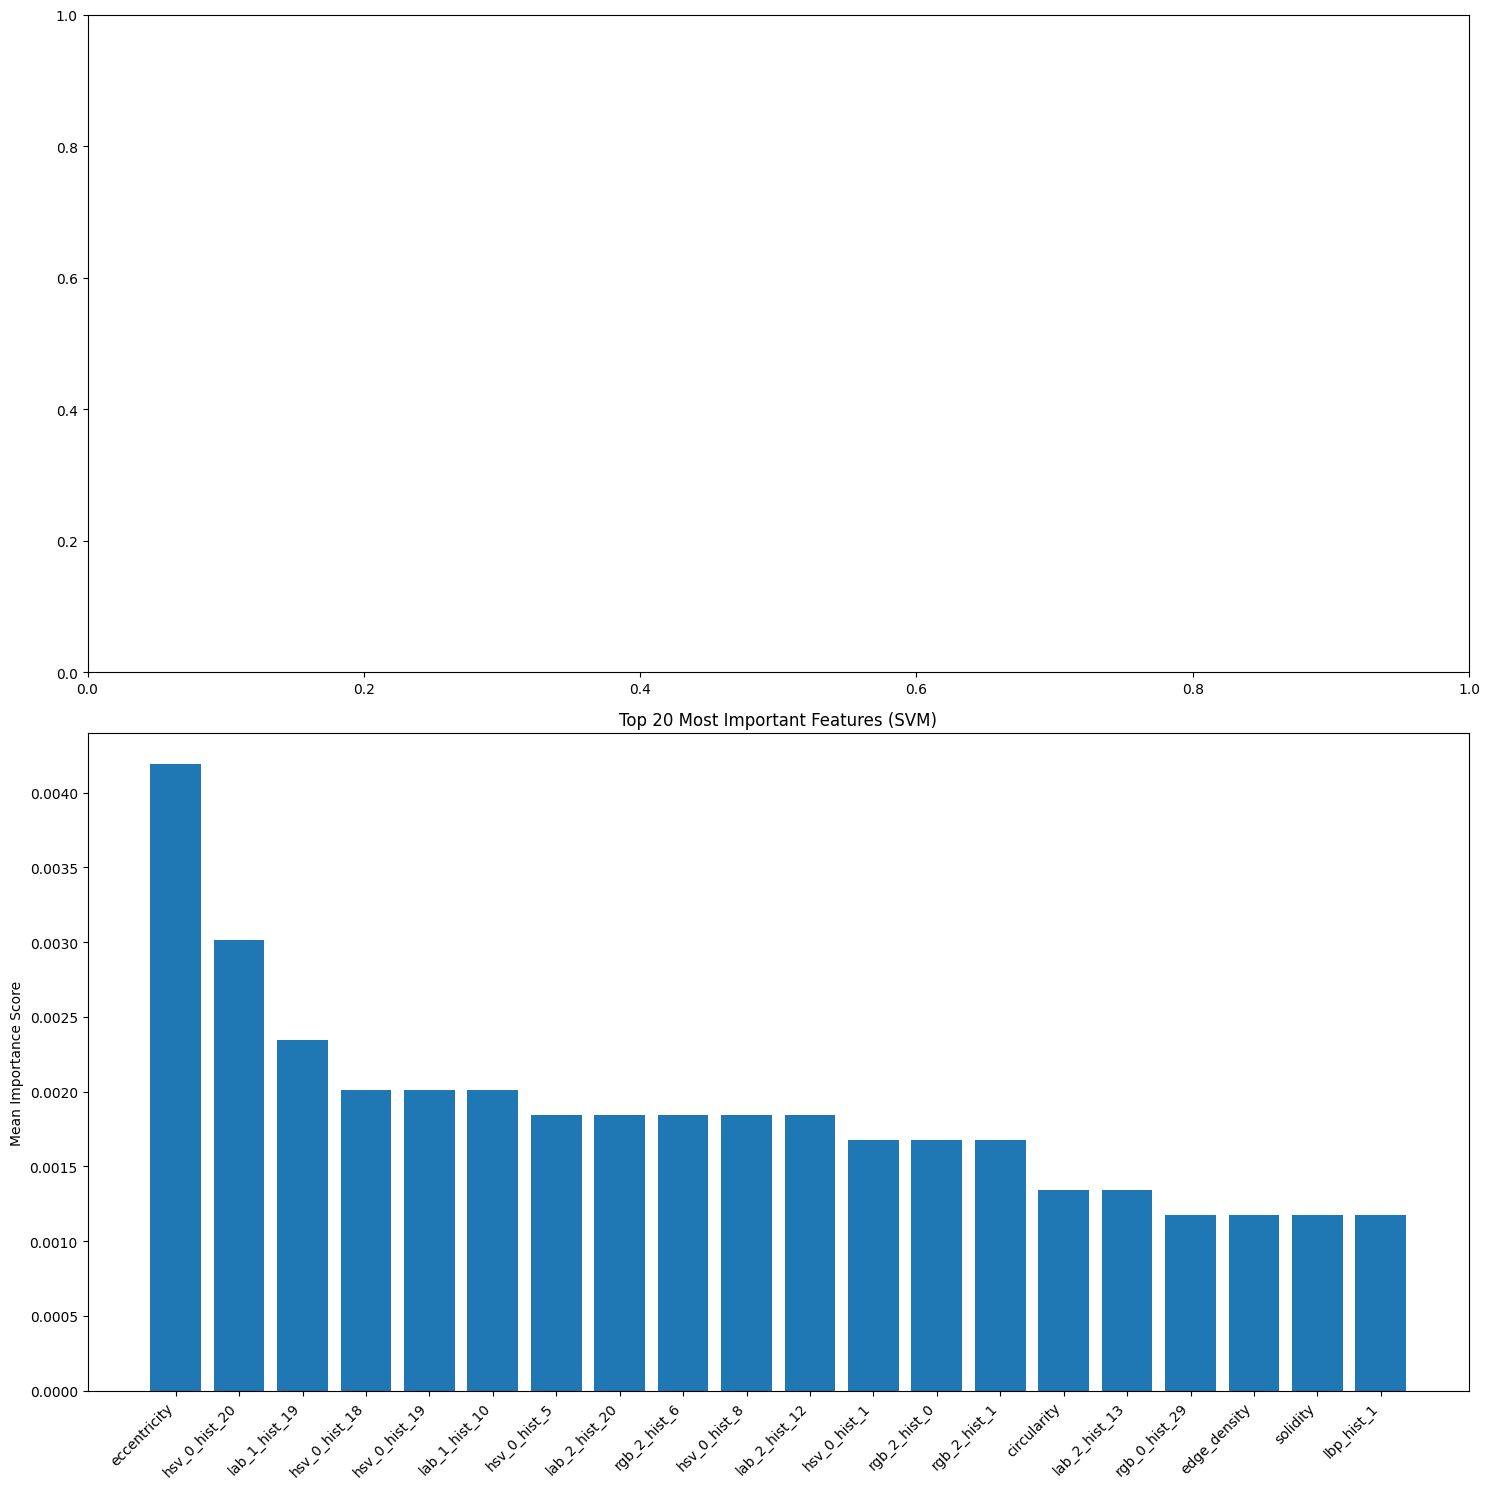

In [14]:
# Calculate permutation importance
def get_feature_importance(
    model, X: np.ndarray, y: np.ndarray, n_repeats: int = 6
) -> np.ndarray:
    """
    Calculate permutation feature importance scores

    Args:
        model: Fitted model
        X: Input features
        y: Target values
        n_repeats: Number of times to permute each feature

    Returns:
        Array of mean importance scores for each feature
    """
    result = permutation_importance(
        model, X, y - 1, n_repeats=n_repeats, random_state=42, n_jobs=8
    )
    return result.importances_mean


# Get feature importances
# xgb_importance = get_feature_importance(xgb, X_test, y_test)
svm_importance = get_feature_importance(svm, X_test, y_test)

# Plot feature importances
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))


def plot_importance(
    importance_scores: np.ndarray, feature_names: list, ax: plt.Axes, title: str
) -> None:
    """
    Create bar plot of feature importance scores

    Args:
        importance_scores: Array of importance scores
        feature_names: List of feature names
        ax: Matplotlib axes object
        title: Plot title
    """
    indices = np.argsort(importance_scores)[::-1]
    top_k = 20  # Show top 20 features

    ax.bar(range(top_k), importance_scores[indices][:top_k])
    ax.set_xticks(range(top_k))
    ax.set_xticklabels(feature_names[indices][:top_k], rotation=45, ha="right")
    ax.set_title(f"Top {top_k} Most Important Features ({title})")
    ax.set_ylabel("Mean Importance Score")


feature_names = np.array(X.columns)

# plot_importance(xgb_importance, feature_names, ax1, "XGBoost")
plot_importance(svm_importance, feature_names, ax2, "SVM")

plt.tight_layout()
plt.show()

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import numpy as np

from src.utils_classical import compare_classification_models

In [20]:
# Create pipelines with StandardScaler for each model
models = {
    "KNN": Pipeline(
        [("scaler", StandardScaler()), ("classifier", KNeighborsClassifier())]
    ),
    "MLP": Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "classifier",
                MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
            ),
        ]
    ),
    "Random Forest": Pipeline(
        [
            ("scaler", StandardScaler()),
            ("classifier", RandomForestClassifier(random_state=42)),
        ]
    ),
}

# Compare models with cross validation
results = compare_classification_models(X_train, y_train - 1, models)

print("\nModel Comparison Results:")

Completed KNN: Mean Accuracy = 0.9135
Completed MLP: Mean Accuracy = 0.9691
Completed Random Forest: Mean Accuracy = 0.9721

Model Comparison Results:


In [23]:
print(results.to_markdown(index=False))

| Model         |   Accuracy |
|:--------------|-----------:|
| Random Forest |   0.972083 |
| MLP           |   0.969063 |
| KNN           |   0.913482 |


# XGBoost + dimensionality reduction


In [28]:
import torch

from src.utils_autoencoder import (
    SemiSupervisedAutoencoder,
    create_dataloader,
    full_X_dataloader,
)

In [29]:
autoencoder = SemiSupervisedAutoencoder(
    input_dim=X_train.shape[1],
    encoding_dim=50,
    num_classes=len(set(y_train)),
)

autoencoder.autoencoder.load_state_dict(torch.load("../models/autoencoder_weights.pth"))

<All keys matched successfully>

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

full_data_loader = full_X_dataloader(X_scaled)
reduced_features = autoencoder.extract_features(full_data_loader)

print("Latent features shape:", reduced_features.shape)

Extracted features shape: torch.Size([4971, 50])
Latent features shape: torch.Size([4971, 50])


In [36]:
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from src.utils_classical import compare_classification_models

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Pipeline 1: PCA
pca_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=50)),
        ("classifier", xgb_clf),
    ]
)

# Pipeline 2: LDA
lda_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("lda", LinearDiscriminantAnalysis()),
        ("classifier", xgb_clf),
    ]
)

# Pipeline 3: Pre-trained Autoencoder features
# Note: Features are already reduced, just need classifier
ae_pipeline = Pipeline([("classifier", xgb.XGBClassifier(random_state=42))])

# Dictionary of models to compare
models = {
    "XGBoost + PCA": pca_pipeline,
    "XGBoost + LDA": lda_pipeline,
    "XGBoost + Autoencoder": ae_pipeline,
}

# Compare models with PCA and LDA using original features
results_pca_lda = compare_classification_models(
    X, y - 1, {k: v for k, v in models.items() if k != "XGBoost + Autoencoder"}
)

# Compare model with autoencoder features
results_ae = compare_classification_models(
    reduced_features, y - 1, {"XGBoost + Autoencoder": models["XGBoost + Autoencoder"]}
)

# Combine results
final_results = pd.concat([results_pca_lda, results_ae])
print("\nFinal Results:")
print(final_results.to_markdown(index=False))  # # # # # # # #
print(final_results.to_markdown(index=False))

Completed XGBoost + PCA: Mean Accuracy = 0.9006
Completed XGBoost + LDA: Mean Accuracy = 0.9491
Completed XGBoost + Autoencoder: Mean Accuracy = 0.9165

Final Results:
| Model                 |   Accuracy |
|:----------------------|-----------:|
| XGBoost + LDA         |   0.949104 |
| XGBoost + PCA         |   0.900624 |
| XGBoost + Autoencoder |   0.916514 |
| Model                 |   Accuracy |
|:----------------------|-----------:|
| XGBoost + LDA         |   0.949104 |
| XGBoost + PCA         |   0.900624 |
| XGBoost + Autoencoder |   0.916514 |


# Optuna Hyperparameter Tuning


In [40]:
import optuna
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from src.utils_classical import generate_objective


# Define search spaces for XGBoost hyperparameters
xgb_search_space = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": (0.01, 0.3),
    "subsample": (0.6, 1.0),
    "colsample_bytree": (0.6, 1.0),
    "min_child_weight": [1, 3, 5, 7],
    "gamma": (0, 0.5),
}

# Pipeline for original data + standard scaler
base_pipeline = Pipeline(
    [("scaler", StandardScaler()), ("classifier", xgb.XGBClassifier(random_state=42))]
)

# Pipeline for standard scaler + LDA
lda_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("lda", LinearDiscriminantAnalysis()),
        ("classifier", xgb.XGBClassifier(random_state=42)),
    ]
)

# Create study for original data pipeline
study_base = optuna.create_study(direction="maximize")
objective_base = generate_objective(X, y - 1, base_pipeline, xgb_search_space)
study_base.optimize(objective_base, n_trials=6)

print("\nBest trial (Original Data + StandardScaler):")
print(f"Value: {study_base.best_value:.4f}")
print("Best hyperparameters:", study_base.best_params)

# Create study for LDA pipeline
study_lda = optuna.create_study(direction="maximize")
objective_lda = generate_objective(X, y - 1, lda_pipeline, xgb_search_space)
study_lda.optimize(objective_lda, n_trials=6)

print("\nBest trial (StandardScaler + LDA):")
print(f"Value: {study_lda.best_value:.4f}")
print("Best hyperparameters:", study_lda.best_params)

# Train final models with best parameters
# Original data pipeline
best_base_model = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("classifier", xgb.XGBClassifier(random_state=42, **study_base.best_params)),
    ]
)

# LDA pipeline
best_lda_model = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("lda", LinearDiscriminantAnalysis()),
        ("classifier", xgb.XGBClassifier(random_state=42, **study_lda.best_params)),
    ]
)

# Evaluate final models using cross-validation
final_results = pd.DataFrame(
    {
        "Model": ["XGBoost + StandardScaler (Optimized)", "XGBoost + LDA (Optimized)"],
        "Accuracy": [
            np.mean(cross_val_score(best_base_model, X, y - 1, cv=5)),
            np.mean(cross_val_score(best_lda_model, X, y - 1, cv=5)),
        ],
    }
)

print("\nFinal Results after Hyperparameter Optimization:")
print(final_results.to_markdown(index=False))

[I 2024-12-14 19:23:03,839] A new study created in memory with name: no-name-a55f8ee8-5a89-4fde-8526-dd0154b1d73a
[I 2024-12-14 19:24:09,487] Trial 0 finished with value: 0.9674088753627291 and parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.21682215798085835, 'subsample': 0.6387532181170827, 'colsample_bytree': 0.921632179288466, 'min_child_weight': 1, 'gamma': 0.26929906077232874}. Best is trial 0 with value: 0.9674088753627291.
[I 2024-12-14 19:25:27,342] Trial 1 finished with value: 0.9706285956947717 and parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.0972328107918768, 'subsample': 0.8104763890019653, 'colsample_bytree': 0.8155047101431188, 'min_child_weight': 7, 'gamma': 0.4933418982853346}. Best is trial 1 with value: 0.9706285956947717.
[I 2024-12-14 19:26:24,249] Trial 2 finished with value: 0.9742497194220601 and parameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2253641204685649, 'subsample': 0.7185234979269632, 'co


Best trial (Original Data + StandardScaler):
Value: 0.9771
Best hyperparameters: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.035151634486733765, 'subsample': 0.7921265648741315, 'colsample_bytree': 0.6903310371650624, 'min_child_weight': 1, 'gamma': 0.15267999899982498}


[I 2024-12-14 19:32:17,548] Trial 0 finished with value: 0.9589612044124041 and parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.04224842130280718, 'subsample': 0.6768985372773917, 'colsample_bytree': 0.6497082185568657, 'min_child_weight': 1, 'gamma': 0.23415373413990392}. Best is trial 0 with value: 0.9589612044124041.
[I 2024-12-14 19:32:31,406] Trial 1 finished with value: 0.9535298221489743 and parameters: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.11038426548858894, 'subsample': 0.8769673736707733, 'colsample_bytree': 0.7960320128325131, 'min_child_weight': 3, 'gamma': 0.3210516091250368}. Best is trial 0 with value: 0.9589612044124041.
[I 2024-12-14 19:32:39,784] Trial 2 finished with value: 0.9507131229588588 and parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.054359672580592495, 'subsample': 0.6163997951121263, 'colsample_bytree': 0.6691014445912565, 'min_child_weight': 7, 'gamma': 0.2658607142040738}. Best is trial 0 with


Best trial (StandardScaler + LDA):
Value: 0.9590
Best hyperparameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.04224842130280718, 'subsample': 0.6768985372773917, 'colsample_bytree': 0.6497082185568657, 'min_child_weight': 1, 'gamma': 0.23415373413990392}

Final Results after Hyperparameter Optimization:
| Model                                |   Accuracy |
|:-------------------------------------|-----------:|
| XGBoost + StandardScaler (Optimized) |   0.977066 |
| XGBoost + LDA (Optimized)            |   0.958961 |


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [44]:
# Fit models on full data to generate confusion matrices
# Get the best models from optuna studies
best_base_model = study_base.best_trial.user_attrs.get("model", best_base_model)
best_lda_model = study_lda.best_trial.user_attrs.get("model", best_lda_model)

# Fit and generate predictions using the optimized models
best_base_model.fit(X_train, y_train - 1)  # Fit the model first
best_lda_model.fit(X_train, y_train - 1)  # Fit the model first

base_preds = best_base_model.predict(X_test)
lda_preds = best_lda_model.predict(X_test)

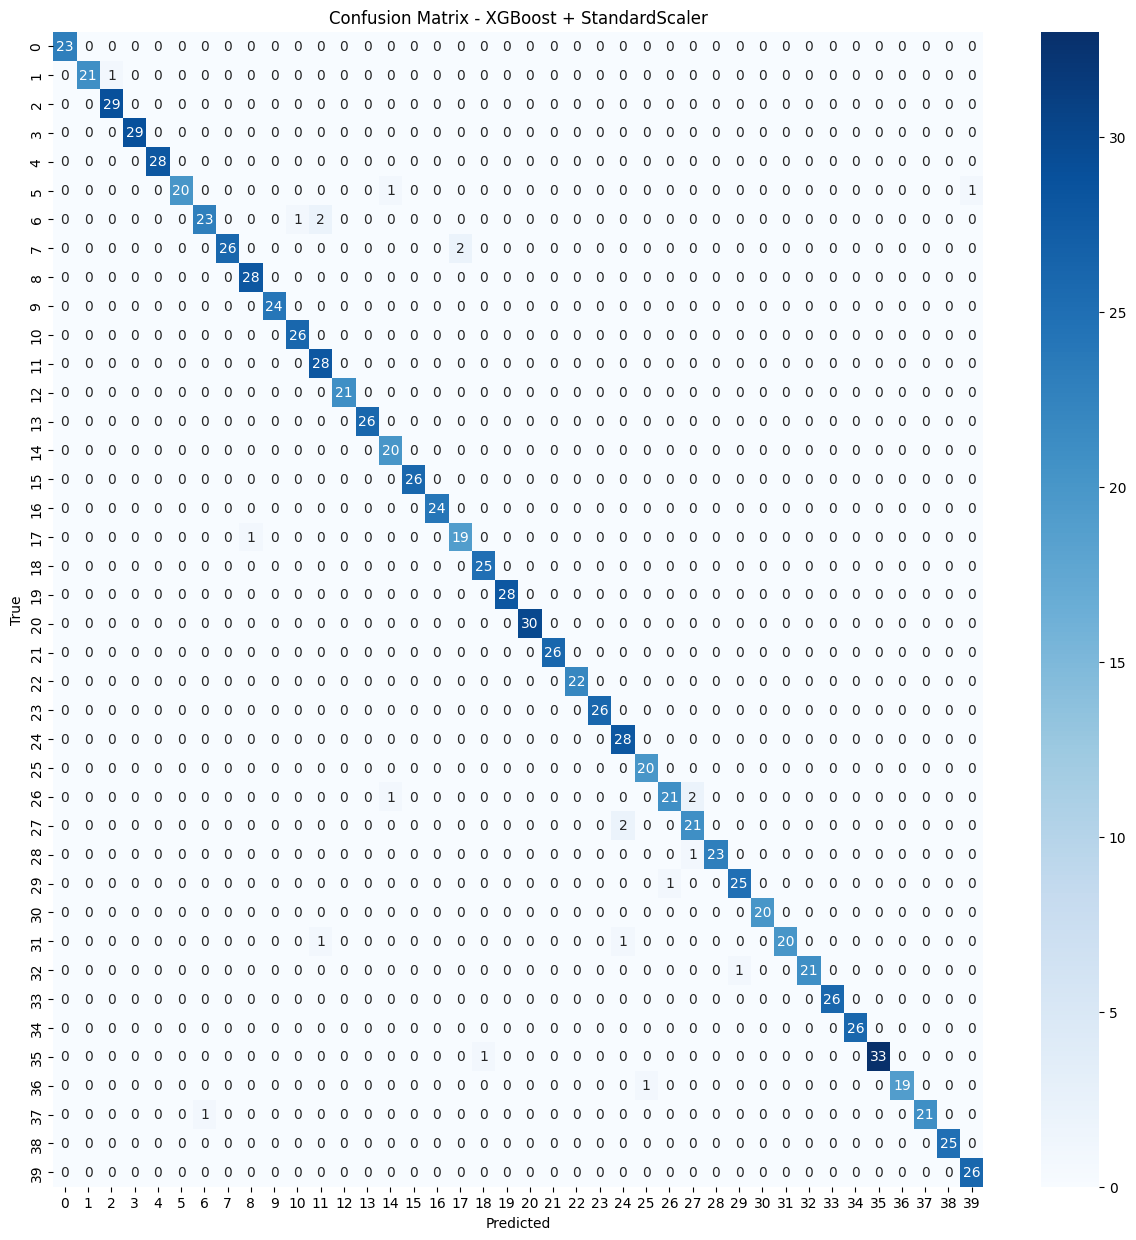

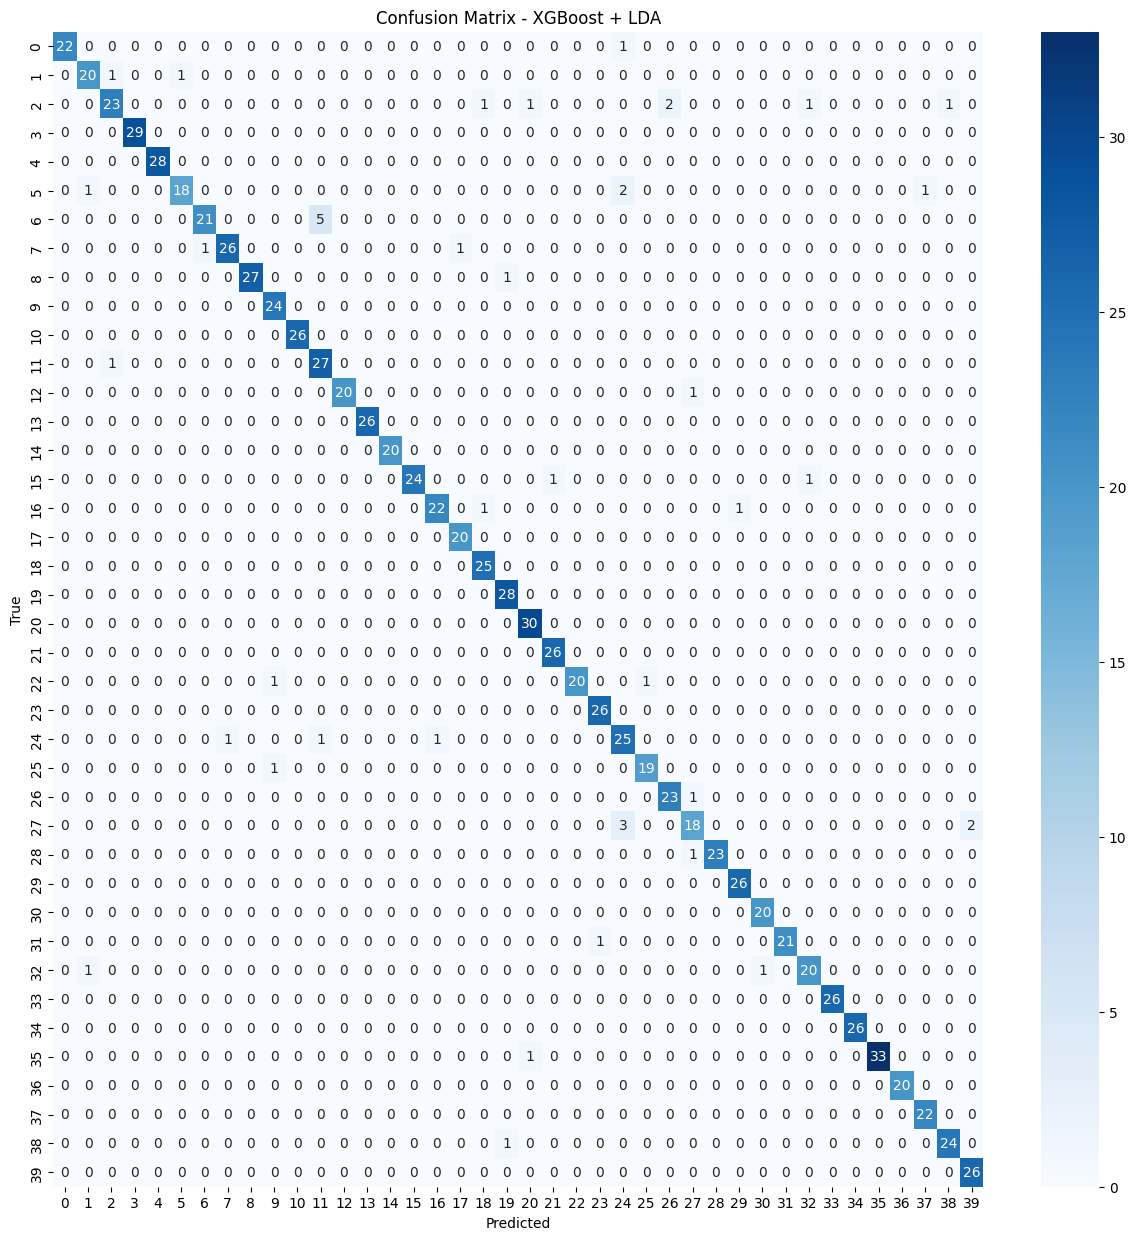

In [45]:
# Plot confusion matrix for base model
plt.figure(figsize=(15, 15))
cm_base = confusion_matrix(y_test - 1, base_preds)
sns.heatmap(cm_base, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost + StandardScaler")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot confusion matrix for LDA model
plt.figure(figsize=(15, 15))
cm_lda = confusion_matrix(y_test - 1, lda_preds)
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost + LDA")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report


In [11]:
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Pipeline with StandardScaler + LDA
xgb_lda = Pipeline(
    [
        ("lda", LinearDiscriminantAnalysis()),
        (
            "xgb",
            XGBClassifier(
                n_estimators=500,
                max_depth=3,
                learning_rate=0.04224842130280718,
                subsample=0.6768985372773917,
                colsample_bytree=0.6497082185568657,
                min_child_weight=1,
                gamma=0.23415373413990392,
                random_state=42,
            ),
        ),
    ]
)


xgb_lda.fit(X_train, y_train - 1)
y_preds_ = xgb_lda.predict(X_test)


# Print classification report
print("Classification Report for XGBoost Model:")
print(classification_report(y_test - 1, y_preds_))

Classification Report for XGBoost Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.91      0.91      0.91        22
           2       0.92      0.79      0.85        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       0.95      0.82      0.88        22
           6       0.96      0.85      0.90        26
           7       0.93      0.93      0.93        28
           8       1.00      0.96      0.98        28
           9       0.92      1.00      0.96        24
          10       1.00      1.00      1.00        26
          11       0.84      0.96      0.90        28
          12       0.95      0.95      0.95        21
          13       0.96      1.00      0.98        26
          14       1.00      1.00      1.00        20
          15       1.00      0.92      0.96        26
          16       0.96      0.96      0